In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
x = np.array([56,72,69,88,102,86,76,79,94,74])
y = np.array([92,102,86,110,130,99,96,102,105,92])

Text(0, 0.5, 'Price')

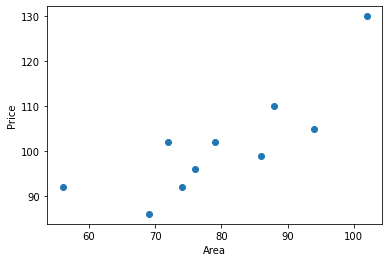

In [12]:
plt.scatter(x,y)
plt.xlabel("Area")
plt.ylabel("Price")

In [13]:
def f(x,w0,w1):
    y = w1*x+w0
    return y

In [14]:
def square_loss(x,y,w0,w1):
    loss = sum(np.square(y - f(x,w0,w1)))
    return loss

In [15]:
def w_calculator(x, y):
    n = len(x)
    w1 = (n*sum(x*y) - sum(x)*sum(y)) / (n*sum(x*x) - sum(x)*sum(x))
    w0 = (sum(x*x)*sum(y) - sum(x)*sum(x*y)) / (n*sum(x*x) - sum(x)*sum(x))
    
    return w0,w1

In [16]:
w_calculator(x, y)

(41.33509168550616, 0.7545842753077117)

In [17]:
w0,w1 = w_calculator(x, y)
square_loss(x,y,w0,w1)

447.69153479025357

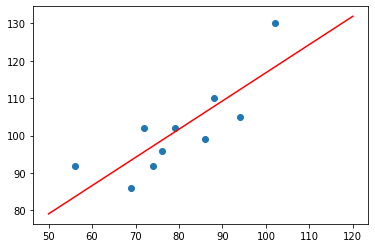

In [19]:
x_temp = np.linspace(50,120,100)
plt.scatter(x,y)
plt.plot(x_temp,x_temp*w1+w0, 'r')

In [20]:
f(150, w0 ,w1)

154.5227329816629

### 通过sklearn库来完成线性回归

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x.reshape(len(x),1), y)

model.intercept_, model.coef_

(41.335091685506185, array([0.75458428]))

### 最小二乘法的矩阵推导
$$
W = (X^TX)^{-1}X^Ty
$$


In [23]:
def w_matrix(x, y):
    w = (x.T * x).I * x.T *y
    return w

In [24]:
# 将x转化为[1,x]格式， 计算w值
x = np.matrix([[1,56],[1,72],[1,69],[1,88],[1,102],[1,86],[1,76],[1,79],[1,94],[1,74]])
y = np.matrix([92,102,86,110,130,99,96,102,105,92])

w_matrix(x, y.reshape(10, 1))

matrix([[41.33509169],
        [ 0.75458428]])